#Part 1: Structures of the Heliosphere


## Introduction
The Voyager 2 spacecraft took measurements of plasma parameters, magnetic field, and energetic particles as it traveled through various regions of the outer heliosphere and into the inter stellar medium.  

For this portion of the lab, you will explore the data from Voyager to find typical data for each region and indications of the transition from one region to another.

#### Load Standard Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

####Load PySPEDAS
The [PySPEADAS Package](https://pyspedas.readthedocs.io/en/latest/) is an implementation of the Space Physics Environment Data Analysis Software (SPEDAS) framework in Python. This pacakge provides easy access to a wide range of NASA missions in the [CDAweb catalog](https://cdaweb.gsfc.nasa.gov/), as well as some  plotting tools.

In [2]:
!pip install -q pyspedas
import pyspedas
import pytplot as pt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.0/114.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

The following commands can be used to explore what missions and instruments are available, but you don't need to do that right now.

In [ ]:
#cdaweb_obj = pyspedas.CDAWeb() #Create cdaweb object
#cdaweb_obj.get_observatories()
#cdaweb_obj.get_instruments()

We will use the 'Voyager' mission and the 'Plasma and Solar Wind' instrument list which is includes the Plasma Lab Suite (PLS) on Voyager.

In [3]:
cdaweb_obj = pyspedas.CDAWeb() #Create cdaweb object
mission_list = ['Voyager']
instrument_list = ['Plasma and Solar Wind']
#instrument_list = ['Magnetic Fields (space)']
dataset_list = cdaweb_obj.get_datasets(mission_list, instrument_list)
print(dataset_list)

['VG1_PWS_LR (1977-09-05 to 2025-05-28)', 'VG2_PWS_LR (1977-08-20 to 2025-05-28)', 'VOYAGER1_PLS_COMPOSITION (1979-03-03 to 1979-03-05)', 'VOYAGER1_PLS_ELECTRONS_E1 (1979-02-28 to 1979-03-22)', 'VOYAGER1_PLS_ELECTRONS_E2 (1979-02-28 to 1979-03-22)', 'VOYAGER1_PLS_HIRES_PLASMA_DATA (1977-09-07 to 1980-12-31)', 'VOYAGER1_PLS_IONS_L (1979-02-28 to 1979-03-22)', 'VOYAGER1_PLS_IONS_M (1979-02-28 to 1979-03-22)', 'VOYAGER2_PLS_COMPOSITION (1979-07-07 to 1979-07-10)', 'VOYAGER2_PLS_ELECTRONS_E1 (1979-07-02 to 1979-08-03)', 'VOYAGER2_PLS_ELECTRONS_E2 (1979-07-02 to 1979-08-03)', 'VOYAGER2_PLS_HIRES_PLASMA_DATA (1977-08-21 to 2007-08-30)', 'VOYAGER2_PLS_HIRES_PLASMA_DATA_HSH (2007-08-27 to 2018-11-05)', 'VOYAGER2_PLS_IONS_L (1979-02-28 to 1979-08-03)', 'VOYAGER2_PLS_IONS_M (1979-07-02 to 1979-08-03)']


## Explore Data Optioins
The output of the above cell is a list of data sets avaialble. The data sets available have either a 'VG1' or 'VG2' prefix indicating which spacecraft collected the data. On the outbound trip to the outer heliosphere, plasma instrument suite on Voyager 1 failed, so we will focus on the 'VG2' data set. In particular, we will use *'VOYAGER2_COHO1HR_MERGED_MAG_PLASMA (1977-01-01 to 2020-12-31)'* which is a merging of data from the plasma instrument, magnetometer, and the energetic particle instruments into one data stream.

In [4]:
# Choose which data set
dataset = 'VOYAGER2_COHO1HR_MERGED_MAG_PLASMA (1977-01-01 to 2020-12-31)'

#start and end time for data set
start_time = '2005-06-01 00:00:00'
end_time = '2005-07-01 00:00:00'

urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='V2_')

02-Jun-25 17:39:56: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2005/voyager2_coho1hr_merged_mag_plasma_20050601_v01.cdf to /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2005/voyager2_coho1hr_merged_mag_plasma_20050601_v01.cdf
02-Jun-25 17:39:56: Download complete: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2005/voyager2_coho1hr_merged_mag_plasma_20050601_v01.cdf
02-Jun-25 17:39:56: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2005/voyager2_coho1hr_merged_mag_plasma_20050701_v01.cdf to /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2005/voyager2_coho1hr_merged_mag_plasma_20050701_v01.cdf
02-Jun-25 17:39:57: Download complete: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2005/voyager2_coho1hr_merged_mag_plasma_20050701_v01.cdf
02-Jun-25 17:39:57: Downloaded 2 CDF files.
02-Jun-25 17:39:59: Number of tplot variables loaded:34


(2,
 34,
 ['V2_protonFlux3_LECP',
  'V2_protonFlux16_CRS',
  'V2_protonFlux2_CRS',
  'V2_heliographicLongitude',
  'V2_protonFlux10_CRS',
  'V2_protonFlux13_CRS',
  'V2_azimuthAngle',
  'V2_protonFlux11_CRS',
  'V2_F',
  'V2_heliographicLatitude',
  'V2_protonFlux2_LECP',
  'V2_protonFlux1_LECP',
  'V2_protonFlux7_CRS',
  'V2_BN',
  'V2_elevAngle',
  'V2_ABS_B',
  'V2_V',
  'V2_heliocentricDistance',
  'V2_protonFlux14_CRS',
  'V2_protonFlux15_CRS',
  'V2_protonFlux8_CRS',
  'V2_protonFlux5_CRS',
  'V2_protonFlux18_CRS',
  'V2_protonFlux3_CRS',
  'V2_protonFlux9_CRS',
  'V2_protonFlux17_CRS',
  'V2_BR',
  'V2_protonFlux1_CRS',
  'V2_BT',
  'V2_protonFlux6_CRS',
  'V2_protonDensity',
  'V2_protonFlux12_CRS',
  'V2_protonTemp',
  'V2_protonFlux4_CRS'])

###Discussion
The output from the previous cell lists all of the data available for plotting and download. For the first part of the lab we will focus on plotting.  Review the variable names above. Choose a few variables you might want to look at and discuss them with your group.  [This documentation](https://cdaweb.gsfc.nasa.gov/misc/NotesV.html#VOYAGER2_COHO1HR_MERGED_MAG_PLASMA) from CDAweb provides a little more detail about the data (particularly if you scroll down to the data names in bold).


### Activity
The cell below calls the PySPEDAS plotting tool that can use the variable names above. There are a few variables already in there, but you can add to them.

Use this cell to plot the variables that answer the following.  

*   How far is the spacecraft from the Sun?
*   What is a typical plasma density during the period chosen?
*   ... typical speed?
*   Which vector component of the velocity dominates the bulk flow?
*   Which vector component dominates the magnetic field? How does that compare to the velocity?

(The vector components are given in the spacecraft ['RTN' coordinates](https://omniweb.gsfc.nasa.gov/coho/html/cw_data.html#:~:text=RTN%20Coordinate%20System%20The%20RTN,through%20the%20spacecraft%20or%20planet.).)



10-May-25 22:00:30: <frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()

10-May-25 22:00:30: <frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()



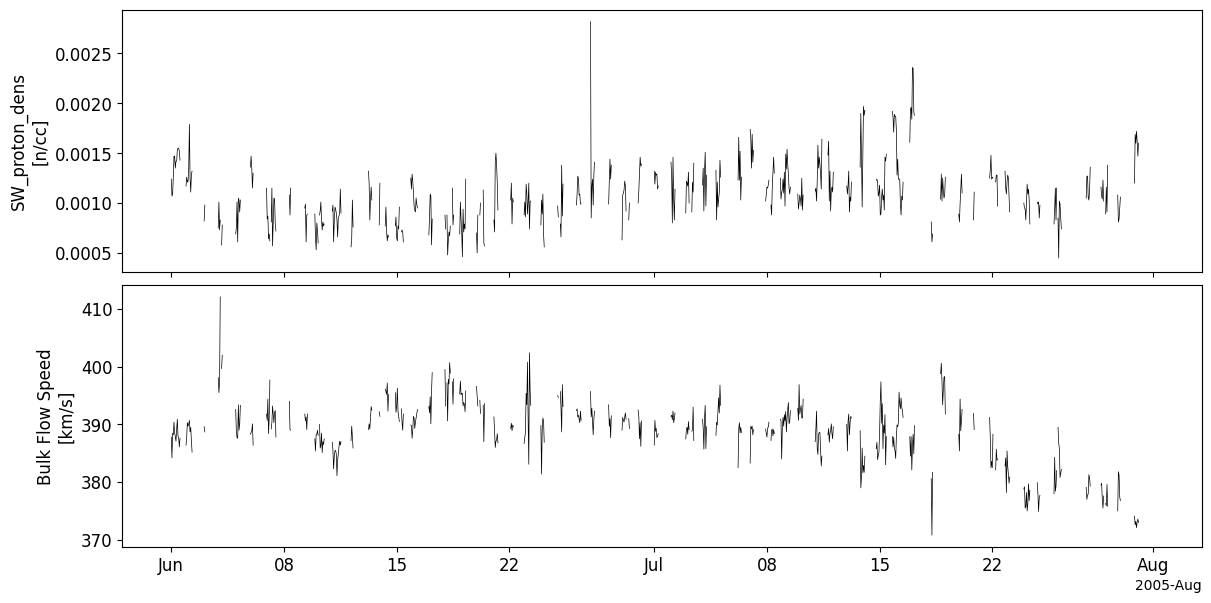

In [ ]:
pt.tplot(['V2_protonDensity','V2_V',])
#pt.tplot(['V2_ABS_B',])
#pt.tplot('V2_heliocentricDistance')

## Heliosphere Structures
In this section you will use the tools above to explore different regions and features of the heliosphere. These include:
- the solar wind
- the termination shock
- the heliosheath
- the heliopause
- the interstellar medium

Use the two cells below (or make your own cells) to explore different time frames and different data to distinguish the different regions and features. Be sure to view all the data you think is important. Record your findings in the table below.  You can add columns to the table using the '|' character.

Feature | AU | Date | speed | density | B-field
--------|-----| ------|-------|---------|---------
Solar Wind| **** | **** | **** | ****
Term Shock| **** | **** | **** | ****
H-Sheath| **** | **** | **** | ****
H - Pause| **** | **** | **** | ****
ISM| **** | **** | **** | ****

### Discussion
Be sure you can justify the results you find above to the people in your group.

02-Jun-25 18:22:42: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070501_v01.cdf
02-Jun-25 18:22:42: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070601_v01.cdf
02-Jun-25 18:22:42: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070701_v01.cdf
02-Jun-25 18:22:42: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070801_v01.cdf
02-Jun-25 18:22:43: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070901_v01.cdf
02-Jun-25 18:22:43: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20071001_v01.cdf
02-Jun-25 18:22:43: Downloaded 6 CDF files.
02-Jun-25 18:22:43: Floating point data values for variable protonFlux1_LECP are all f

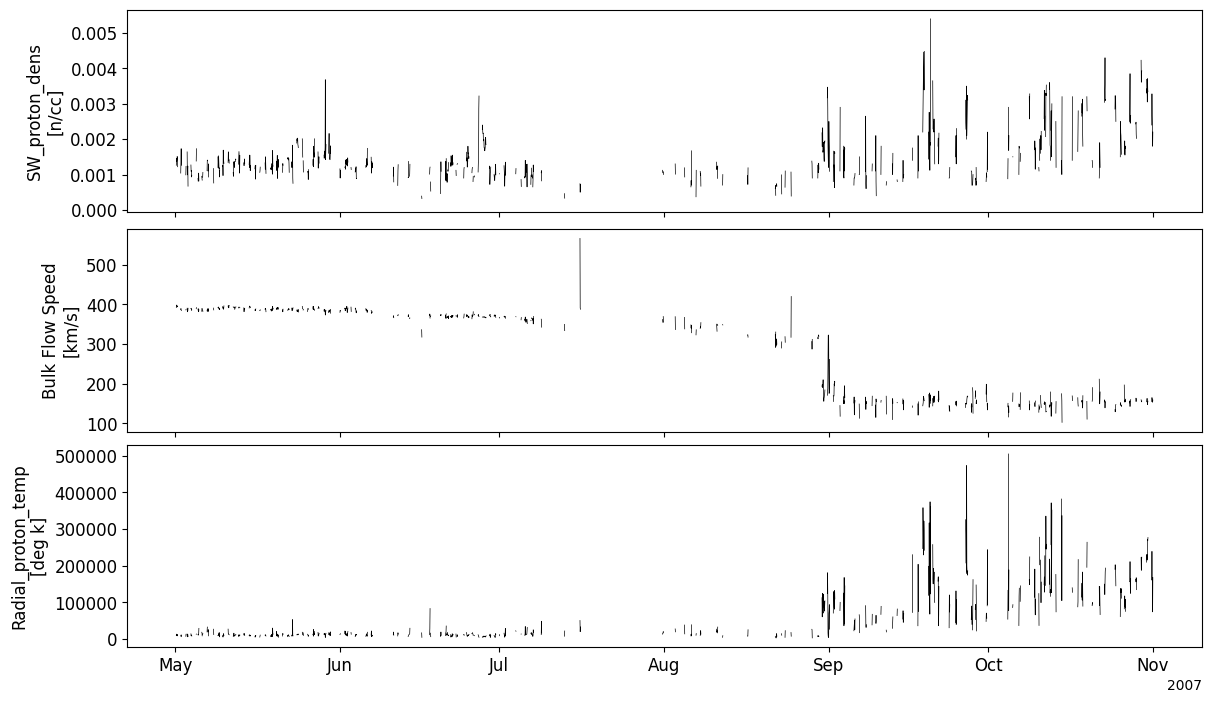

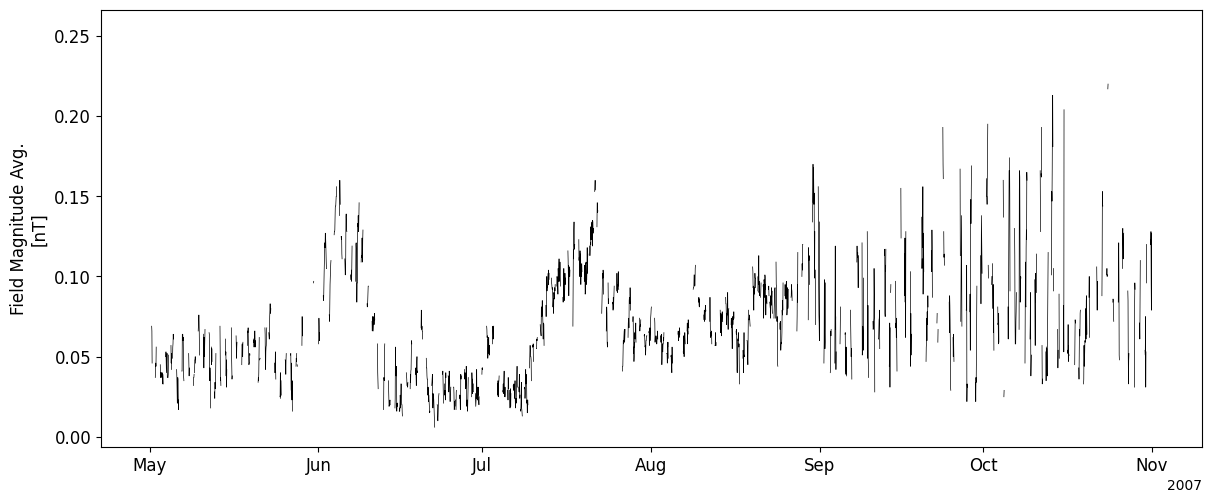

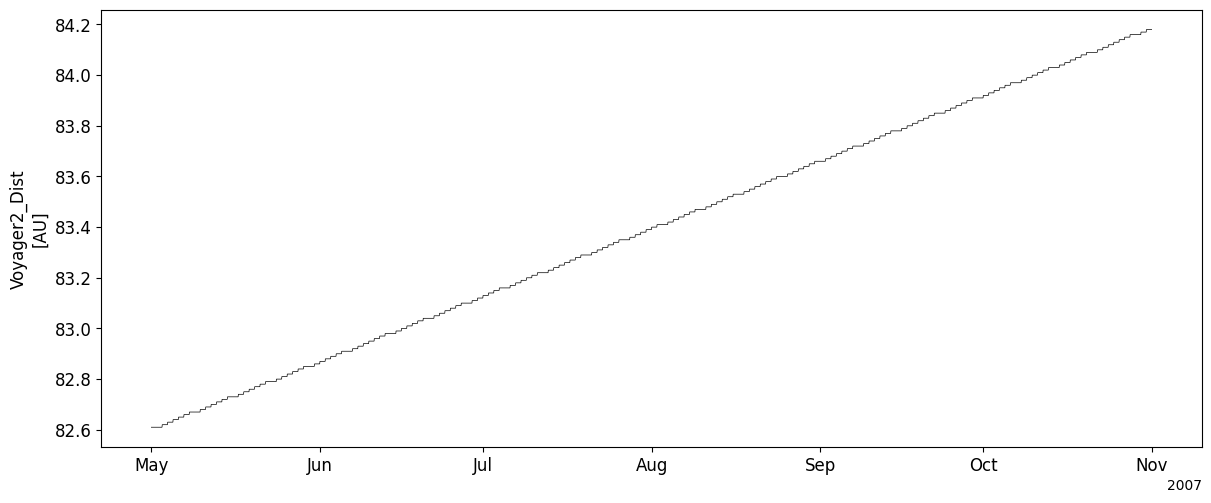

In [9]:
#start and end time for data set
start_time = '2007-05-01 00:00:00'
end_time = '2007-10-01 00:00:00'

urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='V2_')

pt.tplot(['V2_protonDensity','V2_V','V2_protonTemp'])
pt.tplot(['V2_ABS_B',])
pt.tplot('V2_heliocentricDistance')

02-Jun-25 18:23:11: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2017/voyager2_coho1hr_merged_mag_plasma_20170601_v01.cdf
02-Jun-25 18:23:11: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2017/voyager2_coho1hr_merged_mag_plasma_20170701_v01.cdf
02-Jun-25 18:23:11: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2017/voyager2_coho1hr_merged_mag_plasma_20170801_v01.cdf
02-Jun-25 18:23:11: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2017/voyager2_coho1hr_merged_mag_plasma_20170901_v01.cdf
02-Jun-25 18:23:11: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2017/voyager2_coho1hr_merged_mag_plasma_20171001_v01.cdf
02-Jun-25 18:23:12: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2017/voyager2_coho1hr_merged_mag_plasma_20171101_v01.cdf
02-Jun-25 18:23:12: File is current: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2017/voyager2_coho1hr_merged_mag_plasma_20

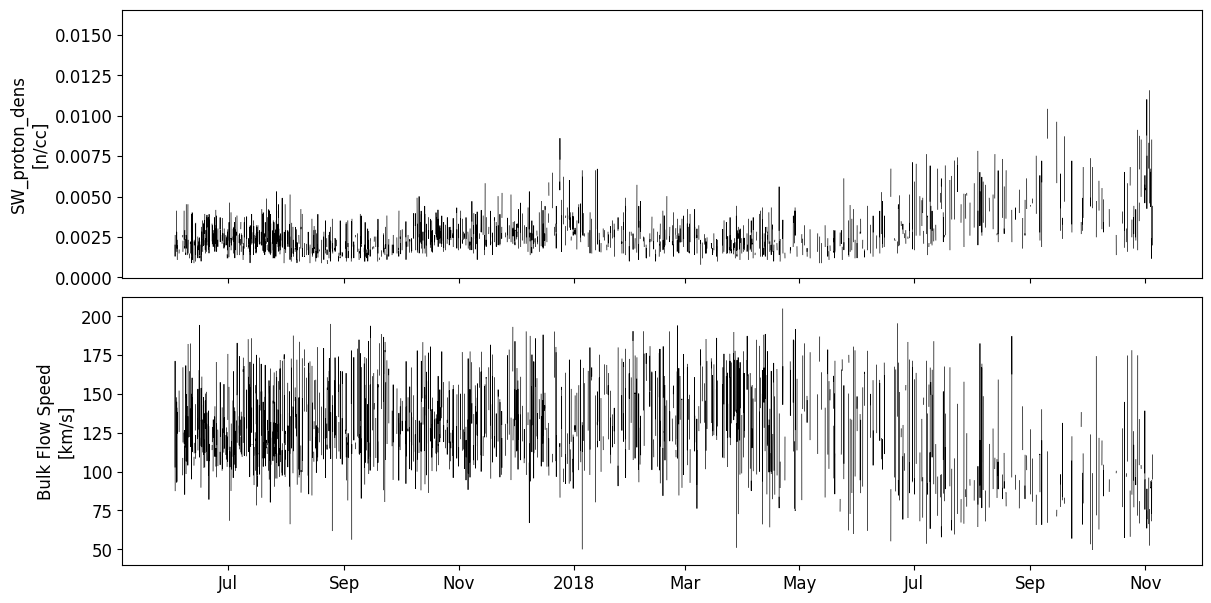

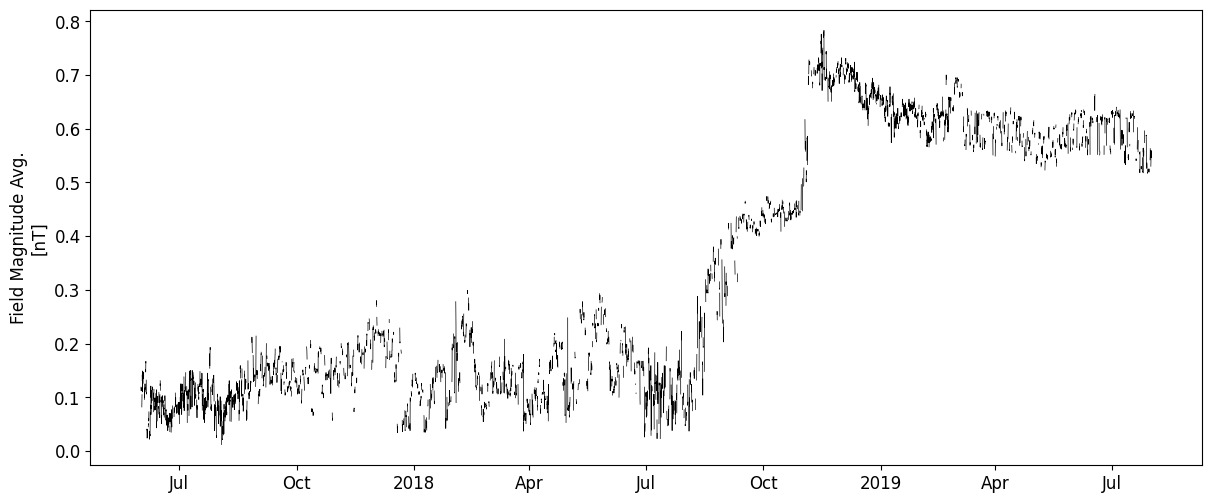

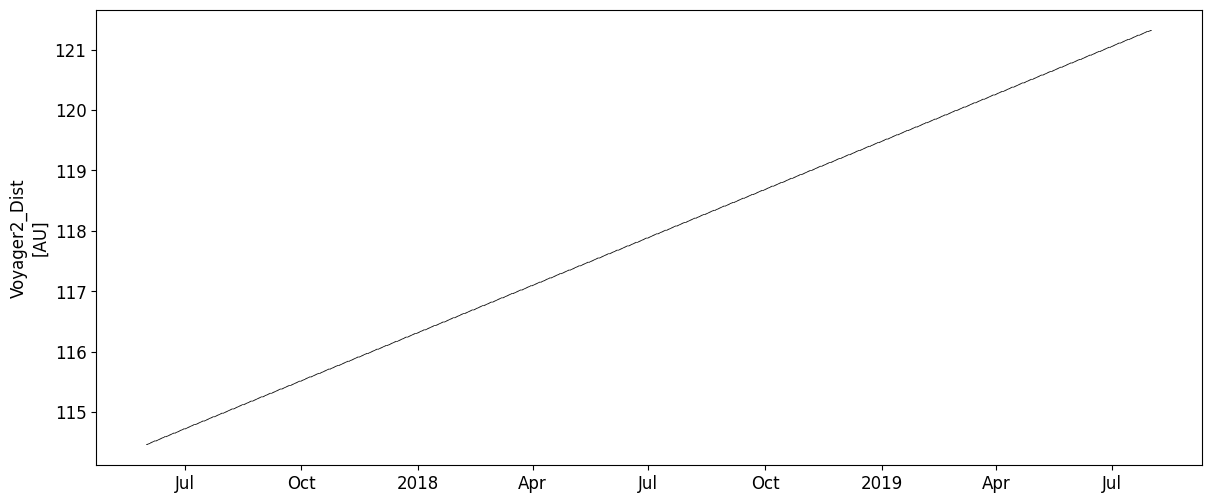

In [11]:
#start and end time for data set
start_time = '2017-06-01 00:00:00'
end_time = '2019-07-01 00:00:00'

urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='V2_')

pt.tplot(['V2_protonDensity','V2_V',])
pt.tplot(['V2_ABS_B',])
pt.tplot('V2_heliocentricDistance')



---


---




# Part 2: Jump Conditions and Pressure Balance at the Termination Shock


In the frame where the shock is stationary, specific “jump conditions” apply, often referred to as the “[Rankin-Hugoniot](https://en.wikipedia.org/wiki/Shocks_and_discontinuities_(magnetohydrodynamics))” conditions.  We will start by considering the first and third relations on this page. You will download some Voyager data to read into a Python Notebook and do some calculations.

For this activity, we will start by looking at
- B Field Magnitude: 'V2_ABS_B'
- Bulk Flow Speed: 'V2_V'
- Proton Number Density: 'V2_protonDensity'
- Proton Temperature: 'V2_protonTemp'
around the termination shock.

Start with the next cell by loading some packages. These will provide some file read functions, data management, numerical functions, and a plotting package.

##Data
#### Fix this!

As above, the data can be accessed from the NASA Heliophysics data portal[CDAweb](https://cdaweb.gsfc.nasa.gov/), which has heliophysics data (plasma, fields, energetic particles, etc.) from a variety of missions.Using PySPEDAS makes accessing this data relatively easy.

In [13]:
#start and end time for data set
%%capture

start_time = '2007-01-01 00:00:00'
end_time = '2007-12-01 00:00:00'

urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='V2_')

02-Jun-25 18:35:10: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070101_v01.cdf to /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070101_v01.cdf
02-Jun-25 18:35:10: Download complete: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070101_v01.cdf
02-Jun-25 18:35:10: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070201_v01.cdf to /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070201_v01.cdf
02-Jun-25 18:35:10: Download complete: /content/cdaweb/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_20070201_v01.cdf
02-Jun-25 18:35:10: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2007/voyager2_coho1hr_merged_mag_plasma_200

In [15]:
from pyspedas import get_data
bmag_dat = get_data('V2_ABS_B')
speed_dat = get_data('V2_V')
den_dat = get_data('V2_protonDensity')
temp_dat = get_data('V2_protonTemp')

time_array = np.array(pyspedas.time_datetime(bmag_dat.times))
Bmag_array = np.array(bmag_dat.y)
speed_array = np.array(speed_dat.y)
den_array = np.array(den_dat.y)
temp_array = np.array(temp_dat.y)

####Remove NaN's


In [16]:
# create mask to remove NaN
id_nans = [w or x or y or z for w, x, y, z in
           zip(np.isnan(Bmag_array),
               np.isnan(speed_array),
               np.isnan(den_array),
               np.isnan(temp_array))] # remove all data where density, velocity, or temp are NaN
id_nans = np.array(id_nans)

# use mask to exclude NaN's
time = time_array[~id_nans]
Bmag = Bmag_array[~id_nans]
speed = speed_array[~id_nans]
den = den_array[~id_nans]
temp = temp_array[~id_nans]

### Time Series Plots

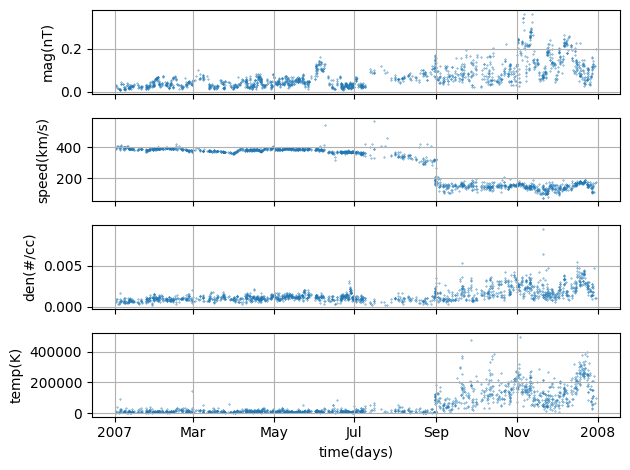

In [17]:
fig, axs = plt.subplots(4, 1,sharex = True)  #use the same x-axis for all plots

axs[0].scatter(time, Bmag,0.1)
axs[0].set_ylabel('mag(nT)')
axs[0].grid(True)

axs[1].scatter(time, speed,0.1)
axs[1].set_ylabel('speed(km/s)')
axs[1].grid(True)

axs[2].scatter(time, den,0.1)
axs[2].set_ylabel('den(#/cc)')
axs[2].grid(True)

axs[3].scatter(time, temp,0.1)
axs[3].set_ylabel('temp(K)')
axs[3].grid(True)
axs[3].set_xlabel('time(days)')

fig.tight_layout()

### Examine the Time Series
- *Do you see evidence for the termination shock in these time series plots?*
- *Estimate the strength of the termination shock.*

In your group, consider what processes are happening at the termination shock.  
- Why does the velocity suddenly decrease?
- What does this imply about the density?
- How does the temperature change and why?

## Examine the Jump Conditions
At a plasma shock, the jump conditions for the plasma variables are described [here](https://en.wikipedia.org/wiki/Shocks_and_discontinuities_(magnetohydrodynamics).

You will explore the momentum equation (#1) and the pressure equation (#3) in sections below.


### Momentum Shock Condition
The cell below calculates the momentum density of the plasma, $$\rho v_n$$, as measured by Voyager, and then plots it as a function of time.
- *Review the code below and modify the calcutions to account for the units of momentum density. <br>(Hint: scipy has constants such as the proton mass; scipy.constants.proton_mass* and remember to account for the speed units)

- Note that we have also included a line representing the running average.  (Ignore the dropoff at the end points.)

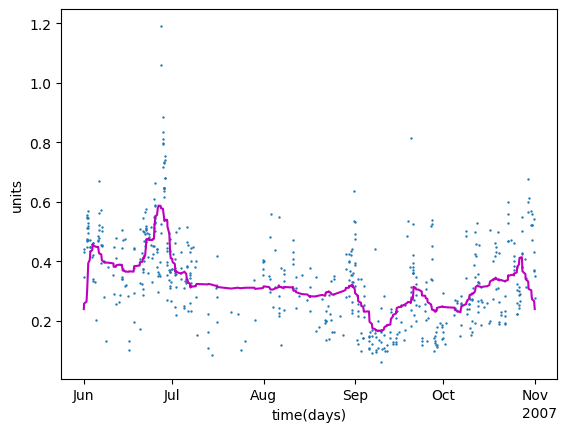

In [ ]:
y = []
for i in range(len(den)):
  y.append(den[i]*speed[i])

plt.scatter(time, y,0.5)
plt.xlabel('time(days)')
plt.ylabel('units') #adjust the units as appropriate

# create a running average and plot
N = 50
y_ave = np.convolve(y, np.ones((N,))/N, mode='same')
plt.plot(time, y_ave, 'm')

#### Momentum Jump Condition Discussion
- *What assumptions were made in this calcultion?  Are those assumptions justified?*
- *Based on this data, is the momentum jump condition satisfied?*


---



###Pressure Jump Conditions


####Ram Pressure
The ram pressure is the pressue due to the bulk flow of the plasma.
$$P_{ram} = \rho {v_n}^2$$

Copy the cell above to calculate and plot the ram pressure.  Be sure the units are either MKS or CGS

In [ ]:
#copy the above cell here and modify to calcuate and plot ram pressue
# be sure to save the ram pressure list with its own name



---



####Thermal Pressure
The thermal pressure can be calculated using the Ideal Gas Law:
$$ PV = N k_bT$$ where $N$ is the number of particles in he volume.  

Rearranging this: $$ P_{thrm} = \frac{N}{V}k_b T = n k_b T$$

where "$n$" is the *number density* (not mass density) and in Scipy, $k_b$ = scipy.constants.k

Use the cell below to calculate and plot the pressure.  

In [ ]:
# Calculate and plot the thermal pressure here



---



#### Magnetic Pressure
In plasmas the magentic field generates a pressure on the plasma.  The magnetic pressure is given by
$$ P_{mag} = \frac{{B_t}^2}{(2 \mu_0)}$$

Pay attention to the units of the magnetic field. The constant $\mu_0$ is "scipy.contants.mu_0".    

In [ ]:
# Calculate and plot the magnetic pressure here

### Discussion and Analysis
- *At the shock, what happens to each pressure term across the shock?*
- *What assumptions were made in using the data provided in these calculations?*
- *Is the total pressure equation balanced across the shock?*
- Try creating a plot that compares these different pressures. (If you create this, put it on the shared document)
- *What might explain any descrepancies you see across the shock?*

### Other Considerations
- If the pressures don't balance, what does that mean about the location of the termination shock?
- How might this be important for future mission planning?
- What other variables would you like to see at the termination shock?